<a href="https://colab.research.google.com/github/starlingomez/preworkmac/blob/master/JULY18TH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.06602715663356132
R-squared: 0.9339728433664387


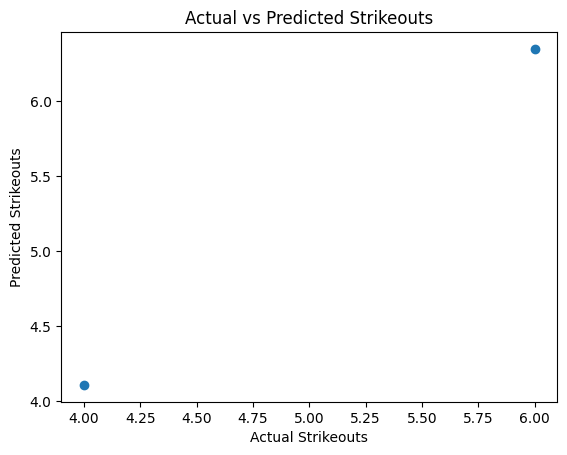

                            Coefficient
innings_pitched                1.063799
total_batter_faced            -0.030599
strikeouts_per_nine_inning     0.651992


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Data dictionary
data = {
    'innings_pitched': [4, 7, 6, 5.2, 6, 4, 6, 5, 6, 7],
    'total_batter_faced': [21, 24, 26, 25, 22, 18, 27, 23, 26, 27],
    'strikeouts_per_nine_inning': [9, 7.71, 10.5, 12.71, 9, 6.75, 4.5, 12.6, 6, 11.57],
    'strikeouts': [4, 6, 7, 8, 6, 3, 3, 7, 4, 9]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Select features and target variable
X = df[['innings_pitched', 'total_batter_faced', 'strikeouts_per_nine_inning']]
y = df['strikeouts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Strikeouts')
plt.ylabel('Predicted Strikeouts')
plt.title('Actual vs Predicted Strikeouts')
plt.show()

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


In [4]:
pip install scikit-learn


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the data
data = {
    'LINE': [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, 1.5, -1.5, -1.5, 1.5],
    'ODD': [134, 114, -103, 104, 108, 120, -137, 124, 154, -122],
    'TOTAL': [9.5, 9, 8.5, 9, 8.5, 9, 8, 9, 9, 9.5],
    'STRIKEOUT': [7, 1, 5, 9, 4, 6, 13, 2, 8, 6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the features (X) and target (y)
X = df[['LINE', 'ODD', 'TOTAL']] # Use uppercase column names
y = df['STRIKEOUT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# Predicting future strikeouts
def predict_strikeouts(x_line, odd, total):
    return model.predict([[x_line, odd, total]])[0]

# Example prediction
print(f"Predicted Strikeouts: {predict_strikeouts(-1.5, 150, 9)}")


Root Mean Squared Error: 3.5580295135221283
Predicted Strikeouts: 5.808002768143901


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import statsmodels.api as sm

# Define the data
data = {
    'LINE': [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, 1.5, -1.5, -1.5, 1.5],
    'ODD': [134, 114, -103, 104, 108, 120, -137, 124, 154, -122],
    'TOTAL': [9.5, 9, 8.5, 9, 8.5, 9, 8, 9, 9, 9.5],
    'STRIKEOUT': [7, 1, 5, 9, 4, 6, 13, 2, 8, 6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the independent variables and the dependent variable
X = df[['LINE', 'ODD', 'TOTAL']]
y = df['STRIKEOUT']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()
summary


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              STRIKEOUT   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.111
Date:                Thu, 18 Jul 2024   Prob (F-statistic):              0.415
Time:                        03:19:16   Log-Likelihood:                -23.920
No. Observations:                  10   AIC:                             55.84
Df Residuals:                       6   BIC:                             57.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0165     24.688      1.216      0.270     -30.392      90.425
LINE           1.9034      1.534      1.241      0.261      -1.849       5.656
ODD            0.0087      0.017      0.495      0.638      -0.034       0.051
TOTAL         -2.5430      2.773     -0.917      0.394      -9.327       4.241
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   2.983
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                0.801
Skew:                          -0.201   Prob(JB):                        0.670
Kurtosis:                       1.673   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Define the new data point
new_data = {
    'const': 1,
    'LINE': -1.5,
    'ODD': 113,
    'TOTAL': 9,
}

# Convert the new data point to a DataFrame
new_df = pd.DataFrame([new_data])

# Predict the total strikeout using the model
predicted_strikeout = model.predict(new_df)
predicted_strikeout


0    5.252203
dtype: float64